In [1]:
import os
import pandas as pd
import seaborn as sns
import random
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [4]:
# Make sure the notebook and the folder "data_processed" are in the same location
p = "./data_processed/study1/"
p2 = "./data_processed/study2/"

In [ ]:
# Create dataframes of responses for each study
df = pd.read_csv(p+"/study1_tidy.csv")
print('df: ', df.shape)
df.drop_duplicates(subset='PID', inplace=True)
print('df: ', df.shape)

df2 = pd.read_csv(p2+"/study2_tidy.csv")
print('df2: ', df2.shape)
df2.drop_duplicates(subset='PID', inplace=True)
print('df2: ', df2.shape)

In [ ]:
# Unique and acceptale responses for each study

df = df[df['exclude']==0]
df2 = df2[df2['exclude']==0]

print(df.shape)
print(df2.shape)

(288, 33)
(307, 33)


In [ ]:
# Get the unique responses (choices) for pre and post attitude questionnaire
 
print(df['att_elic_drug_overdose_opinion_pre'].unique())
print(df2['att_elic_drug_overdose_opinion_pre'].unique())
print('\n')
print(df['att_elic_drug_overdose_opinion_post'].unique())
print(df2['att_elic_drug_overdose_opinion_pre'].unique())
print('\n')
print(df['att_elic_drug_overdose_opinion_pre'].value_counts())
print(df2['att_elic_drug_overdose_opinion_pre'].value_counts())
print('\n')
print(df['att_elic_drug_overdose_opinion_post'].value_counts())
print(df2['att_elic_drug_overdose_opinion_post'].value_counts())

['Extremely serious problem' 'Serious problem' 'Moderate problem'
 'Minor Problem' 'Not at all a problem']
['Extremely serious problem' 'Serious problem' 'Moderate problem'
 'Minor Problem']


['Extremely serious problem' 'Moderate problem' 'serious problem'
 'Minor Problem' 'Not at all a problem']
['Extremely serious problem' 'Serious problem' 'Moderate problem'
 'Minor Problem']


Serious problem              120
Extremely serious problem    105
Moderate problem              55
Minor Problem                  7
Not at all a problem           1
Name: att_elic_drug_overdose_opinion_pre, dtype: int64
Serious problem              122
Extremely serious problem    111
Moderate problem              64
Minor Problem                 10
Name: att_elic_drug_overdose_opinion_pre, dtype: int64


Extremely serious problem    157
serious problem              101
Moderate problem              27
Minor Problem                  2
Not at all a problem           1
Name: att_elic_drug_overdose_opinion_pos

In [ ]:
# Map choices to likert scale

rateIntMap1 = {
    'not at all a problem':1,
    'minor problem': 2,
    'moderate problem':3,
    'serious problem': 4,
    'extremely serious problem':5,
}

rateIntMap2 = {
    'not a priority':1,
    'low priority': 2,
    'neutral':3,
    'moderate priority': 4,
    'high priority':5,
}

rateIntMap3 = {
    'strongly oppose':1,
    'somewhat oppose': 2,
    'neutral':3,
    'somewhat favor': 4,
    'strongly favor':5,
}

In [ ]:
columns = [c for c in df.columns if 'att_elic_' in c]
print(columns)

['att_elic_drug_overdose_opinion_pre', 'att_elic_combat_drug_priority_pre', 'att_elic_opinion_on_drug_legalization_pre', 'att_elic_drug_overdose_opinion_post', 'att_elic_combat_drug_priority_post', 'att_elic_opinion_on_drug_legalization_post']


In [ ]:
# Group pre and post responses for each article

c1 = [columns[0], columns[3]]
c2 = [columns[1] ,columns[4]]
c3 = [columns[2], columns[5]]
col_groups = {
    'c1': c1,
    'c2': c2,
    'c3': c3
}


# map likert scale dictionary to respective column groups.

mapping_dict = {
    'c1': rateIntMap1,
    'c2': rateIntMap2,
    'c3': rateIntMap3
}


In [ ]:
for c in c3:
  print('df: ', df[c].unique())
  print('df: ', df[c].isna().value_counts())
  print('df2: ', df2[c].unique())
  print('df2: ', df2[c].isna().value_counts())


df:  ['Somewhat Favor' 'Somewhat Oppose' 'Strongly Favor' 'Strongly Oppose'
 'Neutral']
df:  False    288
Name: att_elic_opinion_on_drug_legalization_pre, dtype: int64
df2:  ['Strongly Oppose' 'Somewhat Favor' 'Somewhat Oppose' 'Strongly Favor'
 'Neutral']
df2:  False    307
Name: att_elic_opinion_on_drug_legalization_pre, dtype: int64
df:  ['Somewhat Favor' 'Strongly Oppose' 'Strongly Favor' 'Neutral'
 'Somewhat Oppose']
df:  False    288
Name: att_elic_opinion_on_drug_legalization_post, dtype: int64
df2:  ['Strongly Oppose' 'Somewhat Oppose' 'Somewhat Favor' 'Neutral'
 'Strongly Favor']
df2:  False    307
Name: att_elic_opinion_on_drug_legalization_post, dtype: int64


In [ ]:
# Add columns with mapped likert scale to dataframes

for g in col_groups:
  for col in col_groups[g]:
    df[f"{col}_int"] = df[col].apply(lambda x: mapping_dict[g][x.lower()])
    # df[f"{col}_int_noise"] =  df[f"{col}_int"].apply(lambda x: x + random.uniform(-.3,.3))

    df2[f"{col}_int"] = df2[col].apply(lambda x: mapping_dict[g][x.lower()])
    # df2[f"{col}_int_noise"] =  df2[f"{col}_int"].apply(lambda x: x + random.uniform(-.3,.3))
    print('df', df[f"{col}_int"].isna().value_counts())
    print('df2', df2[f"{col}_int"].isna().value_counts())


df False    288
Name: att_elic_drug_overdose_opinion_pre_int, dtype: int64
df2 False    307
Name: att_elic_drug_overdose_opinion_pre_int, dtype: int64
df False    288
Name: att_elic_drug_overdose_opinion_post_int, dtype: int64
df2 False    307
Name: att_elic_drug_overdose_opinion_post_int, dtype: int64
df False    288
Name: att_elic_combat_drug_priority_pre_int, dtype: int64
df2 False    307
Name: att_elic_combat_drug_priority_pre_int, dtype: int64
df False    288
Name: att_elic_combat_drug_priority_post_int, dtype: int64
df2 False    307
Name: att_elic_combat_drug_priority_post_int, dtype: int64
df False    288
Name: att_elic_opinion_on_drug_legalization_pre_int, dtype: int64
df2 False    307
Name: att_elic_opinion_on_drug_legalization_pre_int, dtype: int64
df False    288
Name: att_elic_opinion_on_drug_legalization_post_int, dtype: int64
df2 False    307
Name: att_elic_opinion_on_drug_legalization_post_int, dtype: int64


In [ ]:
pre_cols = [c for c in df.columns if 'int' in c and 'att_elic_' in c and '_pre' in c ]
post_cols = [c for c in df.columns if 'int' in c and 'att_elic_' in c and '_post' in c]

for item in zip(pre_cols, post_cols):
  df[f'att_elic_delta_{item[0][9:-8]}'] = df[item[1]]- df[item[0]]
  df2[f'att_elic_delta_{item[0][9:-8]}'] = df2[item[1]]- df2[item[0]]

for col in pre_cols:
  df[f"{col}_noise"] =  df[col].apply(lambda x: int(x) + random.uniform(-.3,.3))
  df2[f"{col}_noise"] =  df2[col].apply(lambda x: int(x) + random.uniform(-.3,.3))

for col in post_cols:
  df[f"{col}_noise"] =  df[col].apply(lambda x: int(x) + random.uniform(-.3,.3))
  df2[f"{col}_noise"] =  df2[col].apply(lambda x: int(x) + random.uniform(-.3,.3))

print(pre_cols)
print(post_cols)

['att_elic_drug_overdose_opinion_pre_int', 'att_elic_combat_drug_priority_pre_int', 'att_elic_opinion_on_drug_legalization_pre_int']
['att_elic_drug_overdose_opinion_post_int', 'att_elic_combat_drug_priority_post_int', 'att_elic_opinion_on_drug_legalization_post_int']


In [ ]:
delta_cols_1 = [c for c in df if 'att_elic_delta_' in c]
delta_cols_2 = [c for c in df2 if 'att_elic_delta_' in c]

print(delta_cols_1)
print(delta_cols_2)

for col in delta_cols_1:
  df[f"{col}_noise"] =  df[col].apply(lambda x: int(x) + random.uniform(-.3,.3))
  df2[f"{col}_noise"] =  df2[col].apply(lambda x: int(x) + random.uniform(-.3,.3))

['att_elic_delta_drug_overdose_opinion', 'att_elic_delta_combat_drug_priority', 'att_elic_delta_opinion_on_drug_legalization']
['att_elic_delta_drug_overdose_opinion', 'att_elic_delta_combat_drug_priority', 'att_elic_delta_opinion_on_drug_legalization']


In [ ]:
print(delta_cols_1)
print(delta_cols_2)

['att_elic_delta_drug_overdose_opinion', 'att_elic_delta_combat_drug_priority', 'att_elic_delta_opinion_on_drug_legalization']
['att_elic_delta_drug_overdose_opinion', 'att_elic_delta_combat_drug_priority', 'att_elic_delta_opinion_on_drug_legalization']


In [ ]:
for c in delta_cols_1:
  temp = []
  temp2 = []

  for item in df[c]:
    if item > 0 :
      temp.append('positive')
    elif item == 0 :
      temp.append('no change')
    else:
      temp.append('negative')
  df[c+'_type'] = temp

  for item in df2[c]:
    if item > 0 :
      temp2.append('positive')
    elif item == 0 :
      temp2.append('no change')
    else:
      temp2.append('negative')
  df2[c+'_type'] = temp2

In [ ]:
for c in df.columns:
  if '_type' in c:
    print(c)

att_elic_delta_drug_overdose_opinion_type
att_elic_delta_combat_drug_priority_type
att_elic_delta_opinion_on_drug_legalization_type


In [ ]:
order = ['control', 'txt','visual']
rateMap_collection = [rateIntMap1, rateIntMap2, rateIntMap3]
colors = ['#F3766E','green','#7094CD']
change_palette = ['#cb9801','#7A7A7A' ,'#7d5f81']
questions = [
    'What is your opinion on drug overdose in US ?',
    'Should the US make combating drug abuse\n and overdose a priority?',
    'What is your opinion on drug legalization\n and decriminalization in the US?'
]

hue_cols = [
  'att_elic_delta_drug_overdose_opinion_type',
  'att_elic_delta_combat_drug_priority_type',
  'att_elic_delta_opinion_on_drug_legalization_type']

In [ ]:
for c in hue_cols:
  print(c, df[c].unique())
  print(f'{c}:\n',df[c].value_counts().to_dict())

att_elic_delta_drug_overdose_opinion_type ['no change' 'positive' 'negative']
att_elic_delta_drug_overdose_opinion_type:
 {'no change': 189, 'positive': 90, 'negative': 9}
att_elic_delta_combat_drug_priority_type ['no change' 'positive' 'negative']
att_elic_delta_combat_drug_priority_type:
 {'no change': 218, 'positive': 59, 'negative': 11}
att_elic_delta_opinion_on_drug_legalization_type ['no change' 'negative' 'positive']
att_elic_delta_opinion_on_drug_legalization_type:
 {'no change': 232, 'negative': 46, 'positive': 10}


In [ ]:
df.head(3)

recall_Recommend_article recall_Content_surprise recall_view_opinion  \
0                Extremely                A little           Extremely   
3                Extremely               Extremely           Extremely   
6               Moderately                A little               A lot   

                        PID treatment       article study  \
0  558af269fdf99b7dfef4d7bd    visual  drugOverdose   one   
3  5dbe5d44aab19f35c5459b57       txt  drugOverdose   one   
6  5e643d29df313c1ced363682       txt  drugOverdose   one   

  topic_inv_drug_overdose_vlaue_opinion  \
0                                 A lot   
3                            Not at All   
6                            Moderately   

  topic_inv_defend_view_point_drugOverdose topic_inv_learning_drug_overdose  \
0                                    A lot                        Extremely   
3                               Not at All                        Extremely   
6                               Moderately                            A lot   

   ... att_elic_opinion_on_drug_legalization_pre_int_noise  \
0  ...                                           4.018244    
3  ...                                           2.157795    
6  ...                                           4.775943    

  att_elic_drug_overdose_opinion_post_int_noise  \
0                                      5.052253   
3                                      5.005390   
6                                      4.830156   

  att_elic_combat_drug_priority_post_int_noise  \
0                                     4.754853   
3                                     5.202758   
6                                     4.898570   

  att_elic_opinion_on_drug_legalization_post_int_noise  \
0                                           3.822497     
3                                           0.852745     
6                                           5.119029     

  att_elic_delta_drug_overdose_opinion_noise  \
0                                  -0.046601   
3                                  -0.096304   
6                                   1.028923   

  att_elic_delta_combat_drug_priority_noise  \
0                                 -0.145621   
3                                  0.231564   
6                                  0.041935   

  att_elic_delta_opinion_on_drug_legalization_noise  \
0                                         -0.133280   
3                                         -1.035589   
6                                          0.284597   

  att_elic_delta_drug_overdose_opinion_type  \
0                                 no change   
3                                 no change   
6                                  positive   

  att_elic_delta_combat_drug_priority_type  \
0                                no change   
3                                no change   
6                                no change   

  att_elic_delta_opinion_on_drug_legalization_type  
0                                        no change  
3                                         negative  
6                                        no change  

[3 rows x 54 columns]

In [ ]:
df.columns

Index(['recall_Recommend_article', 'recall_Content_surprise',
       'recall_view_opinion', 'PID', 'treatment', 'article', 'study',
       'topic_inv_drug_overdose_vlaue_opinion',
       'topic_inv_defend_view_point_drugOverdose',
       'topic_inv_learning_drug_overdose',
       'topic_inv_motivation_gaining_knowledge',
       'att_elic_drug_overdose_opinion_pre',
       'att_elic_combat_drug_priority_pre',
       'att_elic_opinion_on_drug_legalization_pre',
       'att_elic_drug_overdose_opinion_post',
       'att_elic_combat_drug_priority_post',
       'att_elic_opinion_on_drug_legalization_post', 'gender', 'race',
       'education', 'age', 'education-Comment', 'gender-Comment',
       'race-Comment', 'survey_start', 'study_finish', 'study_duration',
       'cogref_race', 'cogref_sheep', 'cogref_name', 'cogref_volume',
       'cogref_Superbowl', 'exclude', 'att_elic_drug_overdose_opinion_pre_int',
       'att_elic_drug_overdose_opinion_post_int',
       'att_elic_combat_drug_priori

In [ ]:

deltas = ['att_elic_delta_drug_overdose_opinion',
       'att_elic_delta_combat_drug_priority',
       'att_elic_delta_opinion_on_drug_legalization']

In [ ]:
df[deltas[0]]

0      0
3      0
6      1
9      0
12     0
      ..
894    1
900    0
906   -1
909    1
912    2
Name: att_elic_delta_drug_overdose_opinion, Length: 288, dtype: int64

In [ ]:
# prompt: pandas agg specific column?

df.groupby('PID')['att_elic_drug_overdose_opinion_pre'].value_counts()

PID                       att_elic_drug_overdose_opinion_pre
54924b8efdf99b77ccedc1d5  Extremely serious problem             1
54ea5b40fdf99b768609982f  Extremely serious problem             1
55899b8dfdf99b7ae47f5fa4  Extremely serious problem             1
5589a860fdf99b11b2d0404d  Serious problem                       1
558af269fdf99b7dfef4d7bd  Extremely serious problem             1
                                                               ..
63fd47c7fd2e70aebe6f6dbc  Extremely serious problem             1
6400fc210e68bc659a41d16e  Moderate problem                      1
6401a75b449793d40902ae85  Extremely serious problem             1
64057cd2806cfdca58f0de34  Moderate problem                      1
640ff49e2b13337a14256899  Serious problem                       1
Name: att_elic_drug_overdose_opinion_pre, Length: 288, dtype: int64

In [ ]:
sns.heatmap(df[['att_elic_drug_overdose_opinion_pre_int', 'att_elic_drug_overdose_opinion_post_int']])

In [ ]:
df.columns

Index(['recall_Recommend_article', 'recall_Content_surprise',
       'recall_view_opinion', 'PID', 'treatment', 'article', 'study',
       'topic_inv_drug_overdose_vlaue_opinion',
       'topic_inv_defend_view_point_drugOverdose',
       'topic_inv_learning_drug_overdose',
       'topic_inv_motivation_gaining_knowledge',
       'att_elic_drug_overdose_opinion_pre',
       'att_elic_combat_drug_priority_pre',
       'att_elic_opinion_on_drug_legalization_pre',
       'att_elic_drug_overdose_opinion_post',
       'att_elic_combat_drug_priority_post',
       'att_elic_opinion_on_drug_legalization_post', 'gender', 'race',
       'education', 'age', 'education-Comment', 'gender-Comment',
       'race-Comment', 'survey_start', 'study_finish', 'study_duration',
       'cogref_race', 'cogref_sheep', 'cogref_name', 'cogref_volume',
       'cogref_Superbowl', 'exclude', 'att_elic_drug_overdose_opinion_pre_int',
       'att_elic_drug_overdose_opinion_post_int',
       'att_elic_combat_drug_priori

In [ ]:
pivot_c_pairs = [ ('att_elic_drug_overdose_opinion_pre','att_elic_drug_overdose_opinion_post'),
                  ('att_elic_combat_drug_priority_pre','att_elic_combat_drug_priority_post'),
                  ('att_elic_opinion_on_drug_legalization_pre','att_elic_opinion_on_drug_legalization_post')
       ]

In [ ]:
sns.set_style("whitegrid")

In [ ]:
cmap = sns.color_palette("rocket_r", as_cmap=True)
cmap.set_under("white")

att_elic_drug_overdose_opinion_pre
att_elic_drug_overdose_opinion_pre_int   1  2   3   4    5
att_elic_drug_overdose_opinion_post_int                   
5                                        0  0  10  47  100
4                                        0  0  27  70    4
3                                        0  6  17   3    1
2                                        0  1   1   0    0
1                                        1  0   0   0    0
att_elic_combat_drug_priority_pre
att_elic_combat_drug_priority_pre_int   1  2   3   4    5
att_elic_combat_drug_priority_post_int                   
5                                       0  0   3  34  105
4                                       0  3  11  85    8
3                                       1  7  21   0    0
2                                       0  5   1   0    0
1                                       2  1   1   0    0
att_elic_opinion_on_drug_legalization_pre
att_elic_opinion_on_drug_legalization_pre_int    1   2   3   4   5
att

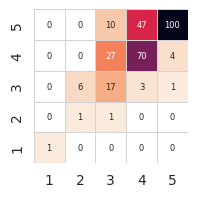

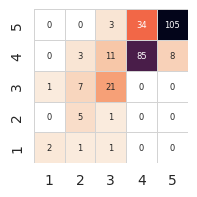

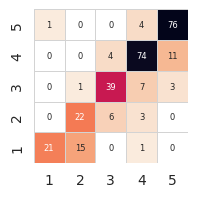

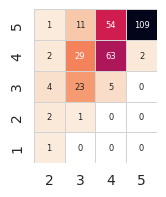

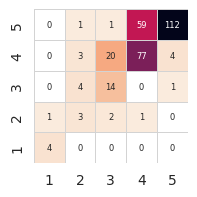

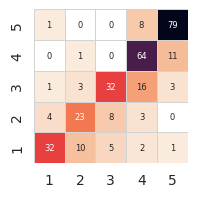

In [ ]:
# fig, axes = plt.subplots(3,2, figsize=(2,4), sharex=True, sharey=True, dpi=300)
annot_kws = {"fontsize": 6}
for i,(pre,post) in enumerate(pivot_c_pairs):
  print(pre)
  pivot_table = df.pivot_table(index=f"{post}_int", columns=f"{pre}_int", aggfunc='size', fill_value=0)
  pivot_table.sort_index(ascending=False,inplace=True)
  print(pivot_table)
  plt.figure(figsize=(2, 2))
  h = sns.heatmap(pivot_table, annot=True, fmt='d', annot_kws=annot_kws, cmap=cmap,square=True,cbar=False,vmin=1,linewidths=0.5,linecolor="lightgray")
  h.set_ylabel("")
  h.set_xlabel("")
  plt.savefig(f'./ali_figs/{pre}_study1.pdf', transparent=True)
for i,(pre,post) in enumerate(pivot_c_pairs):
  print(pre)
  pivot_table = df2.pivot_table(index=f"{post}_int", columns=f"{pre}_int", aggfunc='size', fill_value=0)
  pivot_table.sort_index(ascending=False,inplace=True)
  print(pivot_table)
  plt.figure(figsize=(2, 2))
  h = sns.heatmap(pivot_table, annot=True, fmt='d', annot_kws=annot_kws, cmap=cmap,square=True,cbar=False,vmin=1,linewidths=0.5,linecolor="lightgray")
  h.set_ylabel("")
  h.set_xlabel("")
  plt.savefig(f'./ali_figs/{pre}_study2.pdf', transparent=True)

  # plt.show()

In [ ]:
pivot_table = df.pivot_table(index='att_elic_drug_overdose_opinion_post_int', columns='att_elic_drug_overdose_opinion_pre_int', aggfunc='size', fill_value=0)
pivot_table.sort_index(ascending=False,inplace=True)

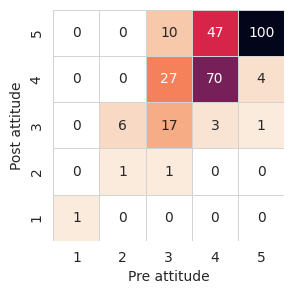

In [ ]:
plt.figure(figsize=(2, 3))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap=cmap,square=True,cbar=False,vmin=1,linewidths=0.5,linecolor="lightgray")
plt.xlabel('Pre attitude')
plt.ylabel('Post attitude')
plt.show()

In [ ]:
pivot_table

att_elic_drug_overdose_opinion_pre_int   1  2   3   4    5
att_elic_drug_overdose_opinion_post_int                   
1                                        1  0   0   0    0
2                                        0  1   1   0    0
3                                        0  6  17   3    1
4                                        0  0  27  70    4
5                                        0  0  10  47  100

In [ ]:
pivot_c_pairs = [ ('att_elic_drug_overdose_opinion_pre','att_elic_drug_overdose_opinion_post'),
                  ('att_elic_combat_drug_priority_pre','att_elic_combat_drug_priority_post'),
                  ('att_elic_opinion_on_drug_legalization_pre','att_elic_opinion_on_drug_legalization_post')
       ]

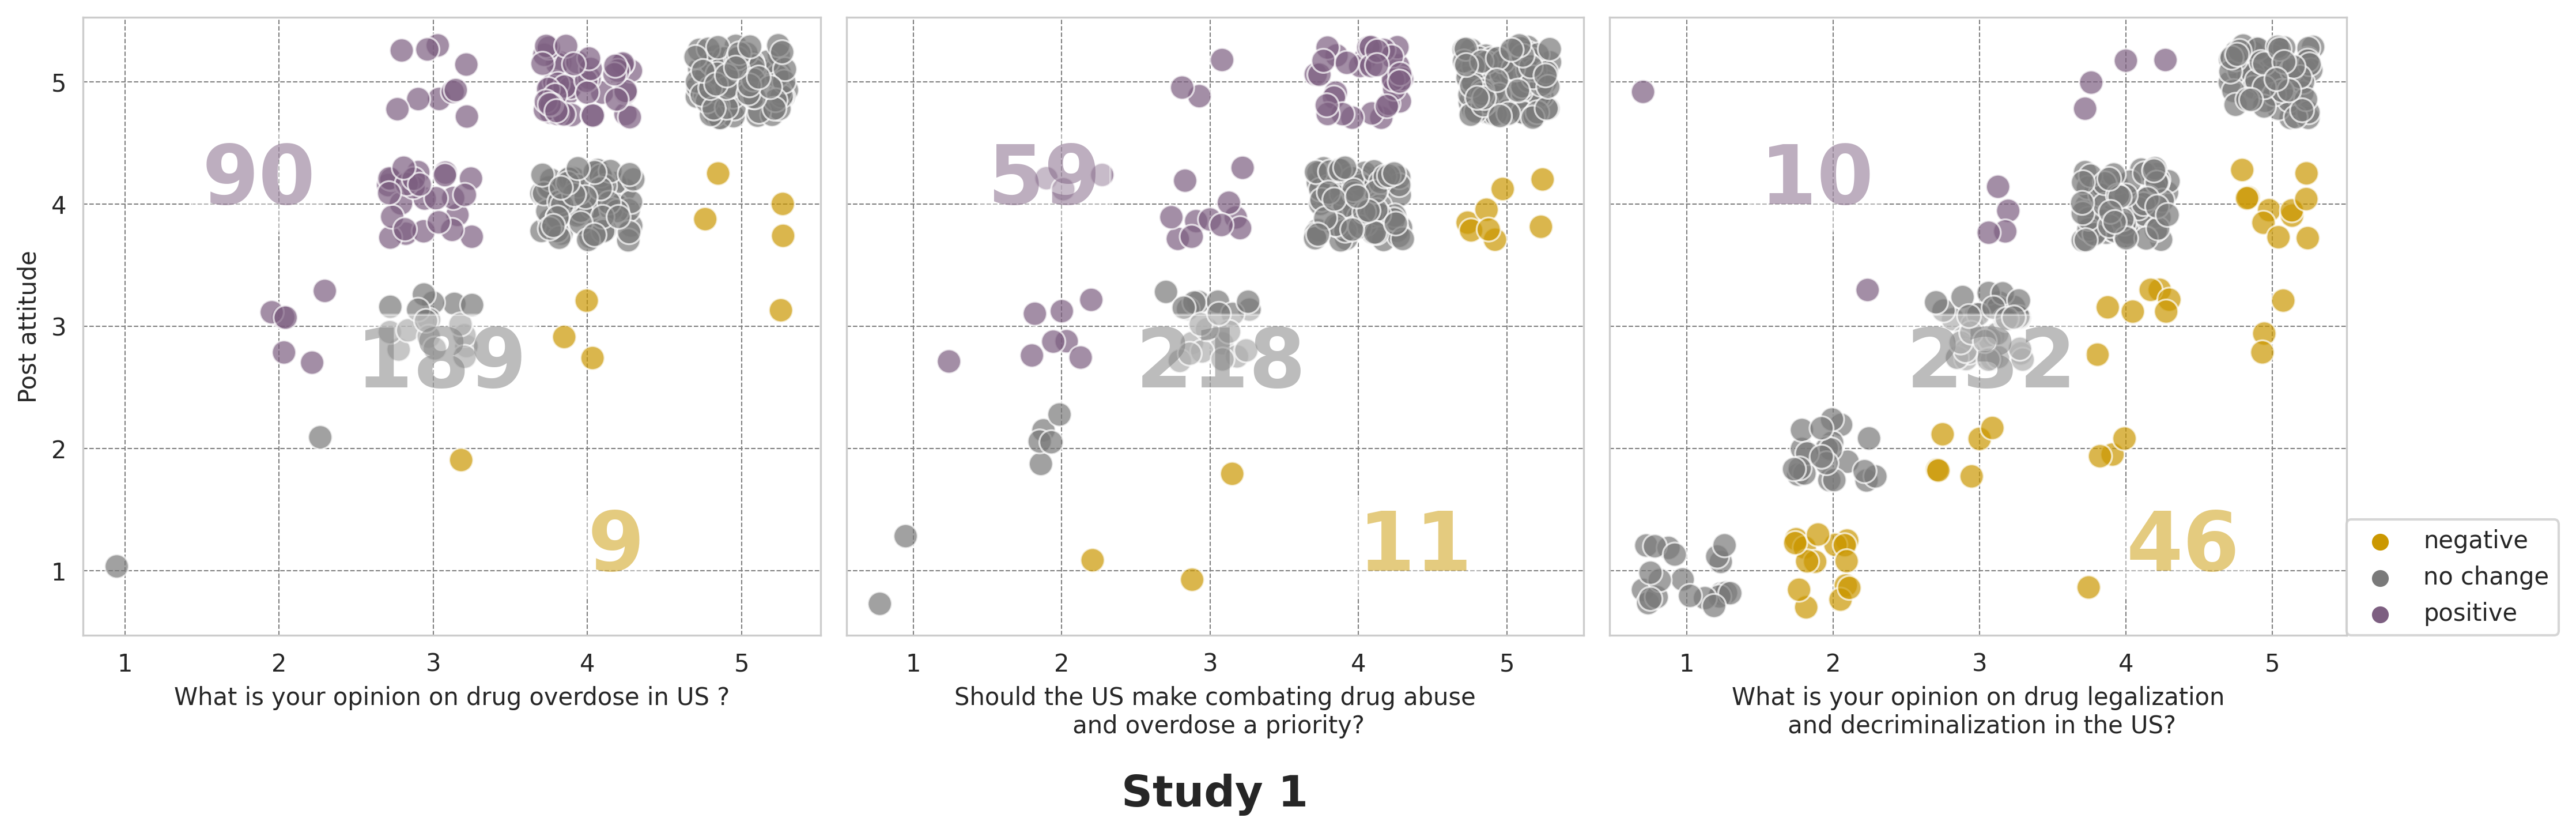

In [ ]:
h_order = ['negative','no change','positive']
text_coords = [(4,1), (2.5,2.5), (1.5, 4)]
pivot_t = ""
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5), sharey=True, dpi=300)
axes = [ax1,ax2,ax3]
for i,c in enumerate(zip(pre_cols, post_cols)):
  if i == 2:
    sns.scatterplot(
      ax = axes[i],
      data = df,
      x = df[c[0]+'_noise'],
      y = df[c[1]+'_noise'],
      hue = hue_cols[i],
      hue_order = h_order,
      alpha = .7,
      legend = True,
      palette = change_palette,
      s = 100)
    axes[i].legend(loc = (1,0))
  else:
    sns.scatterplot(
      ax = axes[i],
      data = df,
      x = df[c[0]+'_noise'],
      y = df[c[1]+'_noise'],
      hue = hue_cols[i],
      alpha = .7,
      legend = False,
      hue_order = h_order,
      palette = change_palette,
      s = 100)
    pivot_t = df.pivot_table(index='att_elic_drug_overdose_opinion_post_int', columns='att_elic_drug_overdose_opinion_pre_int', aggfunc='size', fill_value=0)
    pivot_t.sort_index(ascending=False,inplace=True)
  axes[i].set_xticks(list(range(1,6)))
  axes[i].grid(color='gray', linestyle='--', linewidth=.5, which='both')
  axes[i].set_ylabel('Post attitude', wrap=True)
  axes[i].set_xlabel(questions[i], wrap=True)
  # line = plt.Line2D(xdata=[1,2,3,4,5], ydata=[1,2,3,4,5], linewidth=2, ls='--', c='#353535', antialiased=True)
  # axes[i].add_line(line)
plt.subplot(1,3,2)
plt.title('Study 1', y=-0.3,
          fontdict= {'family':'DejaVu Sans', 'fontsize': 18,
          'fontweight' : 'bold'},
          loc='center')
for i in range(1,4):
  plt.subplot(1,3,i)
  values_dict = df[hue_cols[i-1]].value_counts().to_dict()
  for j, k in enumerate(h_order):
    plt.text(x=text_coords[j][0], y= text_coords[j][1], s=f'{values_dict[k]}', fontdict={'family':'DejaVu Sans', 'fontsize': 34,
          'fontweight' : 'bold', 'color': change_palette[j]}, bbox=dict(facecolor='white', alpha=0.4), alpha=.5)
plt.tight_layout()
plt.savefig('./python_analysis/results_figures/Study1/attitude_change.pdf', transparent=True)
# plt.savefig('./python_analysis/results_figures/Study1/attitude_change.svg')
# plt.savefig('./python_analysis/results_figures/Study1/attitude_change.jpg')


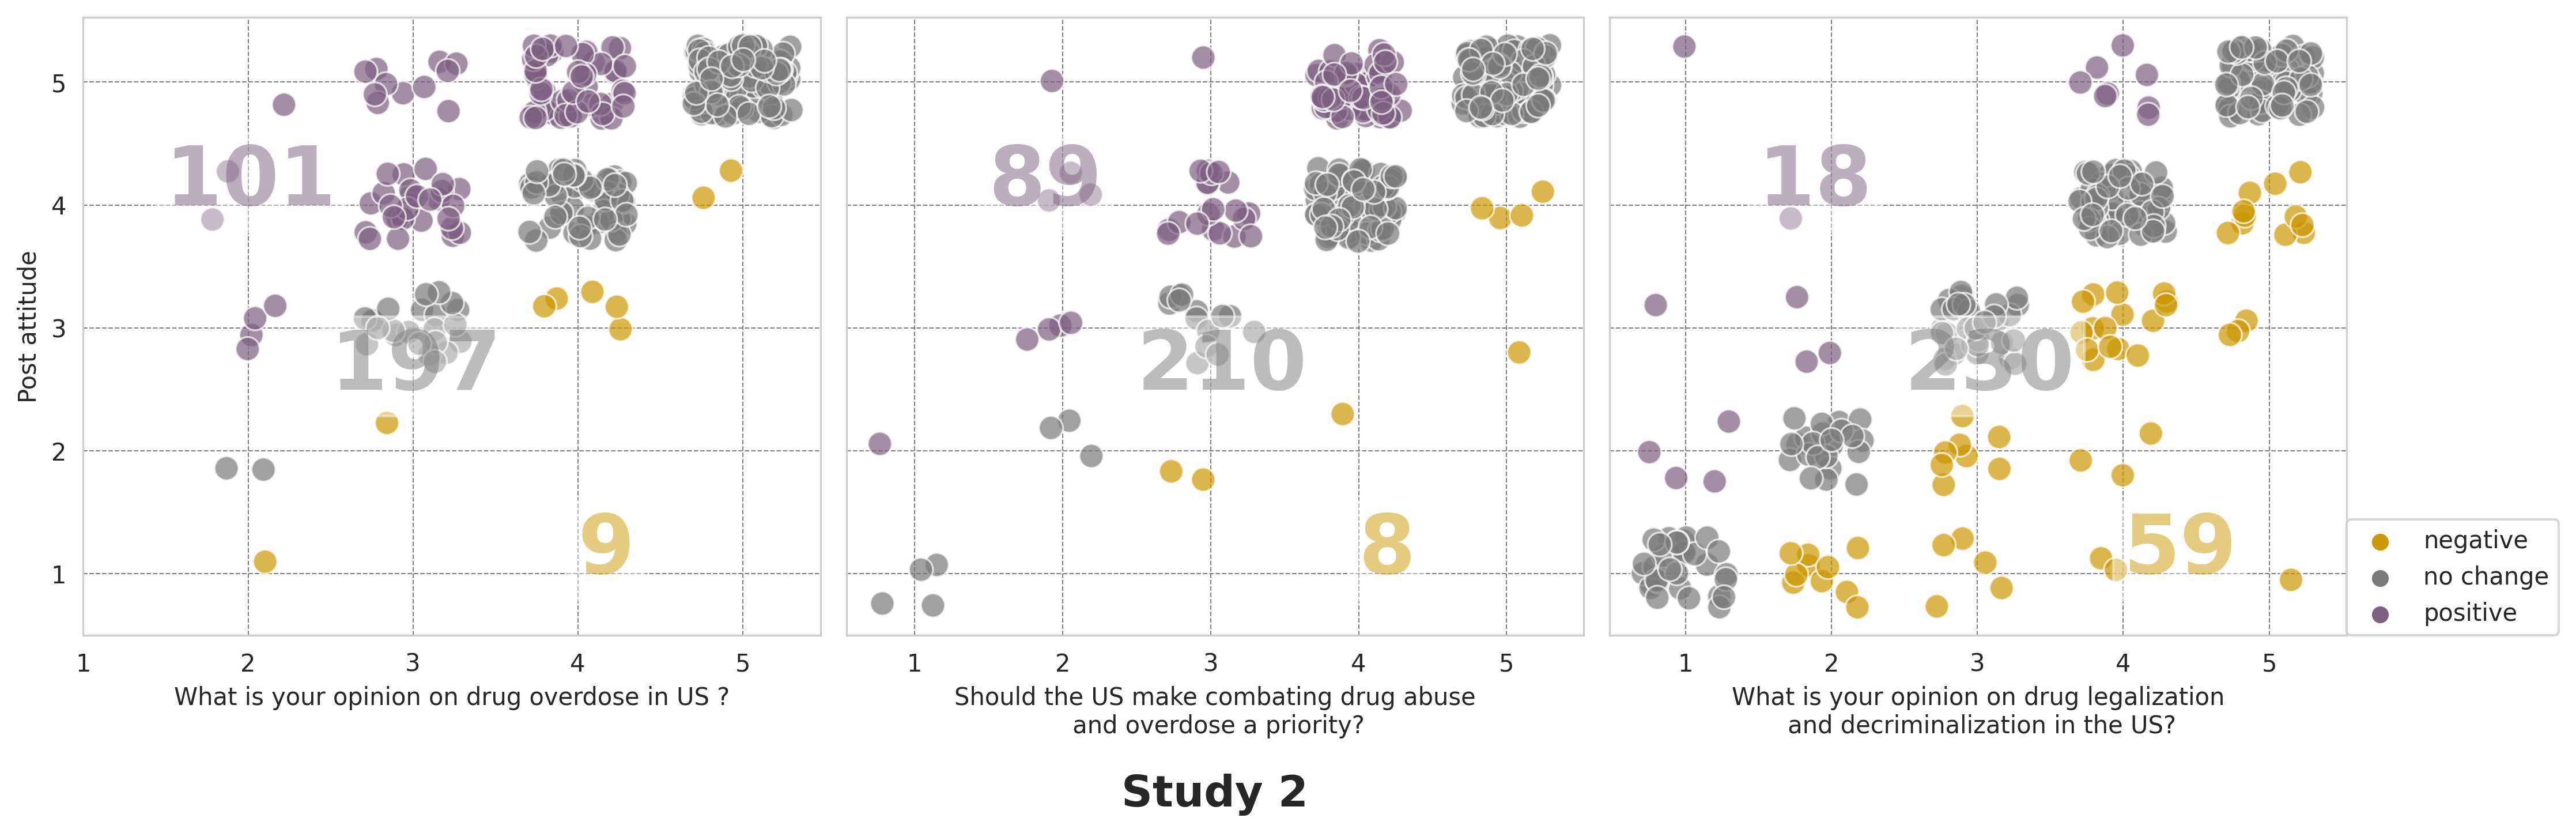

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5), sharey=True, dpi=300)
axes = [ax1,ax2,ax3]
for i,c in enumerate(zip(pre_cols, post_cols)):
  if i == 2:
    sns.scatterplot(
      ax=axes[i],
      data=df2,
      x=df2[c[0]+'_noise'],
      y=df2[c[1]+'_noise'],
      hue= hue_cols[i],
      hue_order=['negative','no change','positive'],
      alpha=.7,
      legend= True,
      palette=change_palette,
      s = 100)
    axes[i].legend(loc=(1,0))
  else:
    sns.scatterplot(
      ax=axes[i],
      data=df2,
      x=df2[c[0]+'_noise'],
      y=df2[c[1]+'_noise'],
      hue= hue_cols[i],
      hue_order=['negative','no change','positive'],
      alpha=.7,
      legend= False,
      palette=change_palette,
      s = 100)
  axes[i].set_xticks(list(range(1,6)))
  axes[i].grid(color='gray', linestyle='--', linewidth=.5, which='both')
  axes[i].set_ylabel('Post attitude', wrap=True)
  axes[i].set_xlabel(questions[i], wrap=True)

  plt.subplot(1,3,2)
plt.title('Study 2', y=-0.3,
          fontdict= {'family':'DejaVu Sans', 'fontsize': 18,
          'fontweight' : 'bold'},
          loc='center')
for i in range(1,4):
  plt.subplot(1,3,i)
  values_dict = df2[hue_cols[i-1]].value_counts().to_dict()
  for j, k in enumerate(h_order):
    plt.text(x=text_coords[j][0], y= text_coords[j][1], s=f'{values_dict[k]}', fontdict={'family':'DejaVu Sans', 'fontsize': 34,
          'fontweight' : 'bold', 'color': change_palette[j]}, bbox=dict(facecolor='white', alpha=0.4), alpha=.5)
plt.tight_layout()
plt.savefig('./python_analysis/results_figures/Study2/attitude_change_study2.pdf', transparent=True)
# plt.savefig('./python_analysis/results_figures/attitude_change_study2.svg')
# plt.savefig('./python_analysis/results_figures/attitude_change_study2.jpg')


In [ ]:
def draw_att_chg(df, ax, col_pairs, legend):
  sns.scatterplot(
      ax= ax, #axes[i]
      data=df,
      x=df[col_pairs[0]+'_noise'],
      y=df[col_pairs[1]+'_noise'],
      hue= hue_cols[i],
      hue_order=['negative','no change','positive'],
      alpha=.7,
      legend= legend,
      palette=change_palette)
  if legend:
    ax.legend(loc=(1,0))


In [ ]:
fig, axes = plt.subplots(2,3, figsize=(15,5), sharey=True, sharex=True)
for j in range(len(axes)):
  if j == 0:
    for i,c in enumerate(zip(pre_cols, post_cols)):
      if i == 2:
        draw_att_chg(df, axes[j][i], c, True)
      else:
        draw_att_chg(df, axes[j][i], c, False)
  else:
    for i,c in enumerate(zip(pre_cols, post_cols)):
      if i == 5:
        draw_att_chg(df2, axes[j][i], c, True)
      else:
        draw_att_chg(df2, axes[j][i], c, False)

for j in range(2):
  for i in range(3):
    axes[j][i].set_xticks(list(range(1,6)))
    axes[j][i].grid(color='gray', linestyle='--', linewidth=.5, which='both')
    axes[j][i].set_ylabel('Post attitude', wrap=True)
    axes[j][i].set_xlabel(questions[i], wrap=True)
plt.tight_layout()
plt.savefig('./python_analysis/results_figures/attitude_change_combined.pdf', transparent=True)
plt.savefig('./python_analysis/results_figures/attitude_change_combined.svg')
plt.savefig('./python_analysis/results_figures/attitude_change_combined.jpg')


In [ ]:
column_pairs = list(zip(pre_cols, post_cols))

for pair in column_pairs:
  print(pair)

type_cols = [c for c in df if '_type' in c]

print('df\n')
for c in type_cols:
  print(c+'\n', df[c].value_counts().to_dict())

print('-'*10+'\n')
print('df2\n')
for c in type_cols:
  print(c+'\n', df2[c].value_counts().to_dict())


('att_elic_drug_overdose_opinion_pre_int', 'att_elic_drug_overdose_opinion_post_int')
('att_elic_combat_drug_priority_pre_int', 'att_elic_combat_drug_priority_post_int')
('att_elic_opinion_on_drug_legalization_pre_int', 'att_elic_opinion_on_drug_legalization_post_int')
df

att_elic_delta_drug_overdose_opinion_type
 {'no change': 189, 'positive': 90, 'negative': 9}
att_elic_delta_combat_drug_priority_type
 {'no change': 218, 'positive': 59, 'negative': 11}
att_elic_delta_opinion_on_drug_legalization_type
 {'no change': 232, 'negative': 46, 'positive': 10}
----------

df2

att_elic_delta_drug_overdose_opinion_type
 {'no change': 197, 'positive': 101, 'negative': 9}
att_elic_delta_combat_drug_priority_type
 {'no change': 210, 'positive': 89, 'negative': 8}
att_elic_delta_opinion_on_drug_legalization_type
 {'no change': 230, 'negative': 59, 'positive': 18}


In [ ]:
def draw_att_chg_vert(df, ax, col_pairs, legend):
  sns.scatterplot(
      ax= ax, #axes[i]
      data=df,
      x=df[col_pairs[0]+'_noise'],
      y=df[col_pairs[1]+'_noise'],
      hue= hue_cols[i],
      hue_order=['negative','no change','positive'],
      alpha=.7,
      legend= legend,
      palette=change_palette,
      s = 100)
  if legend:
    ax.legend(loc=(1,0))


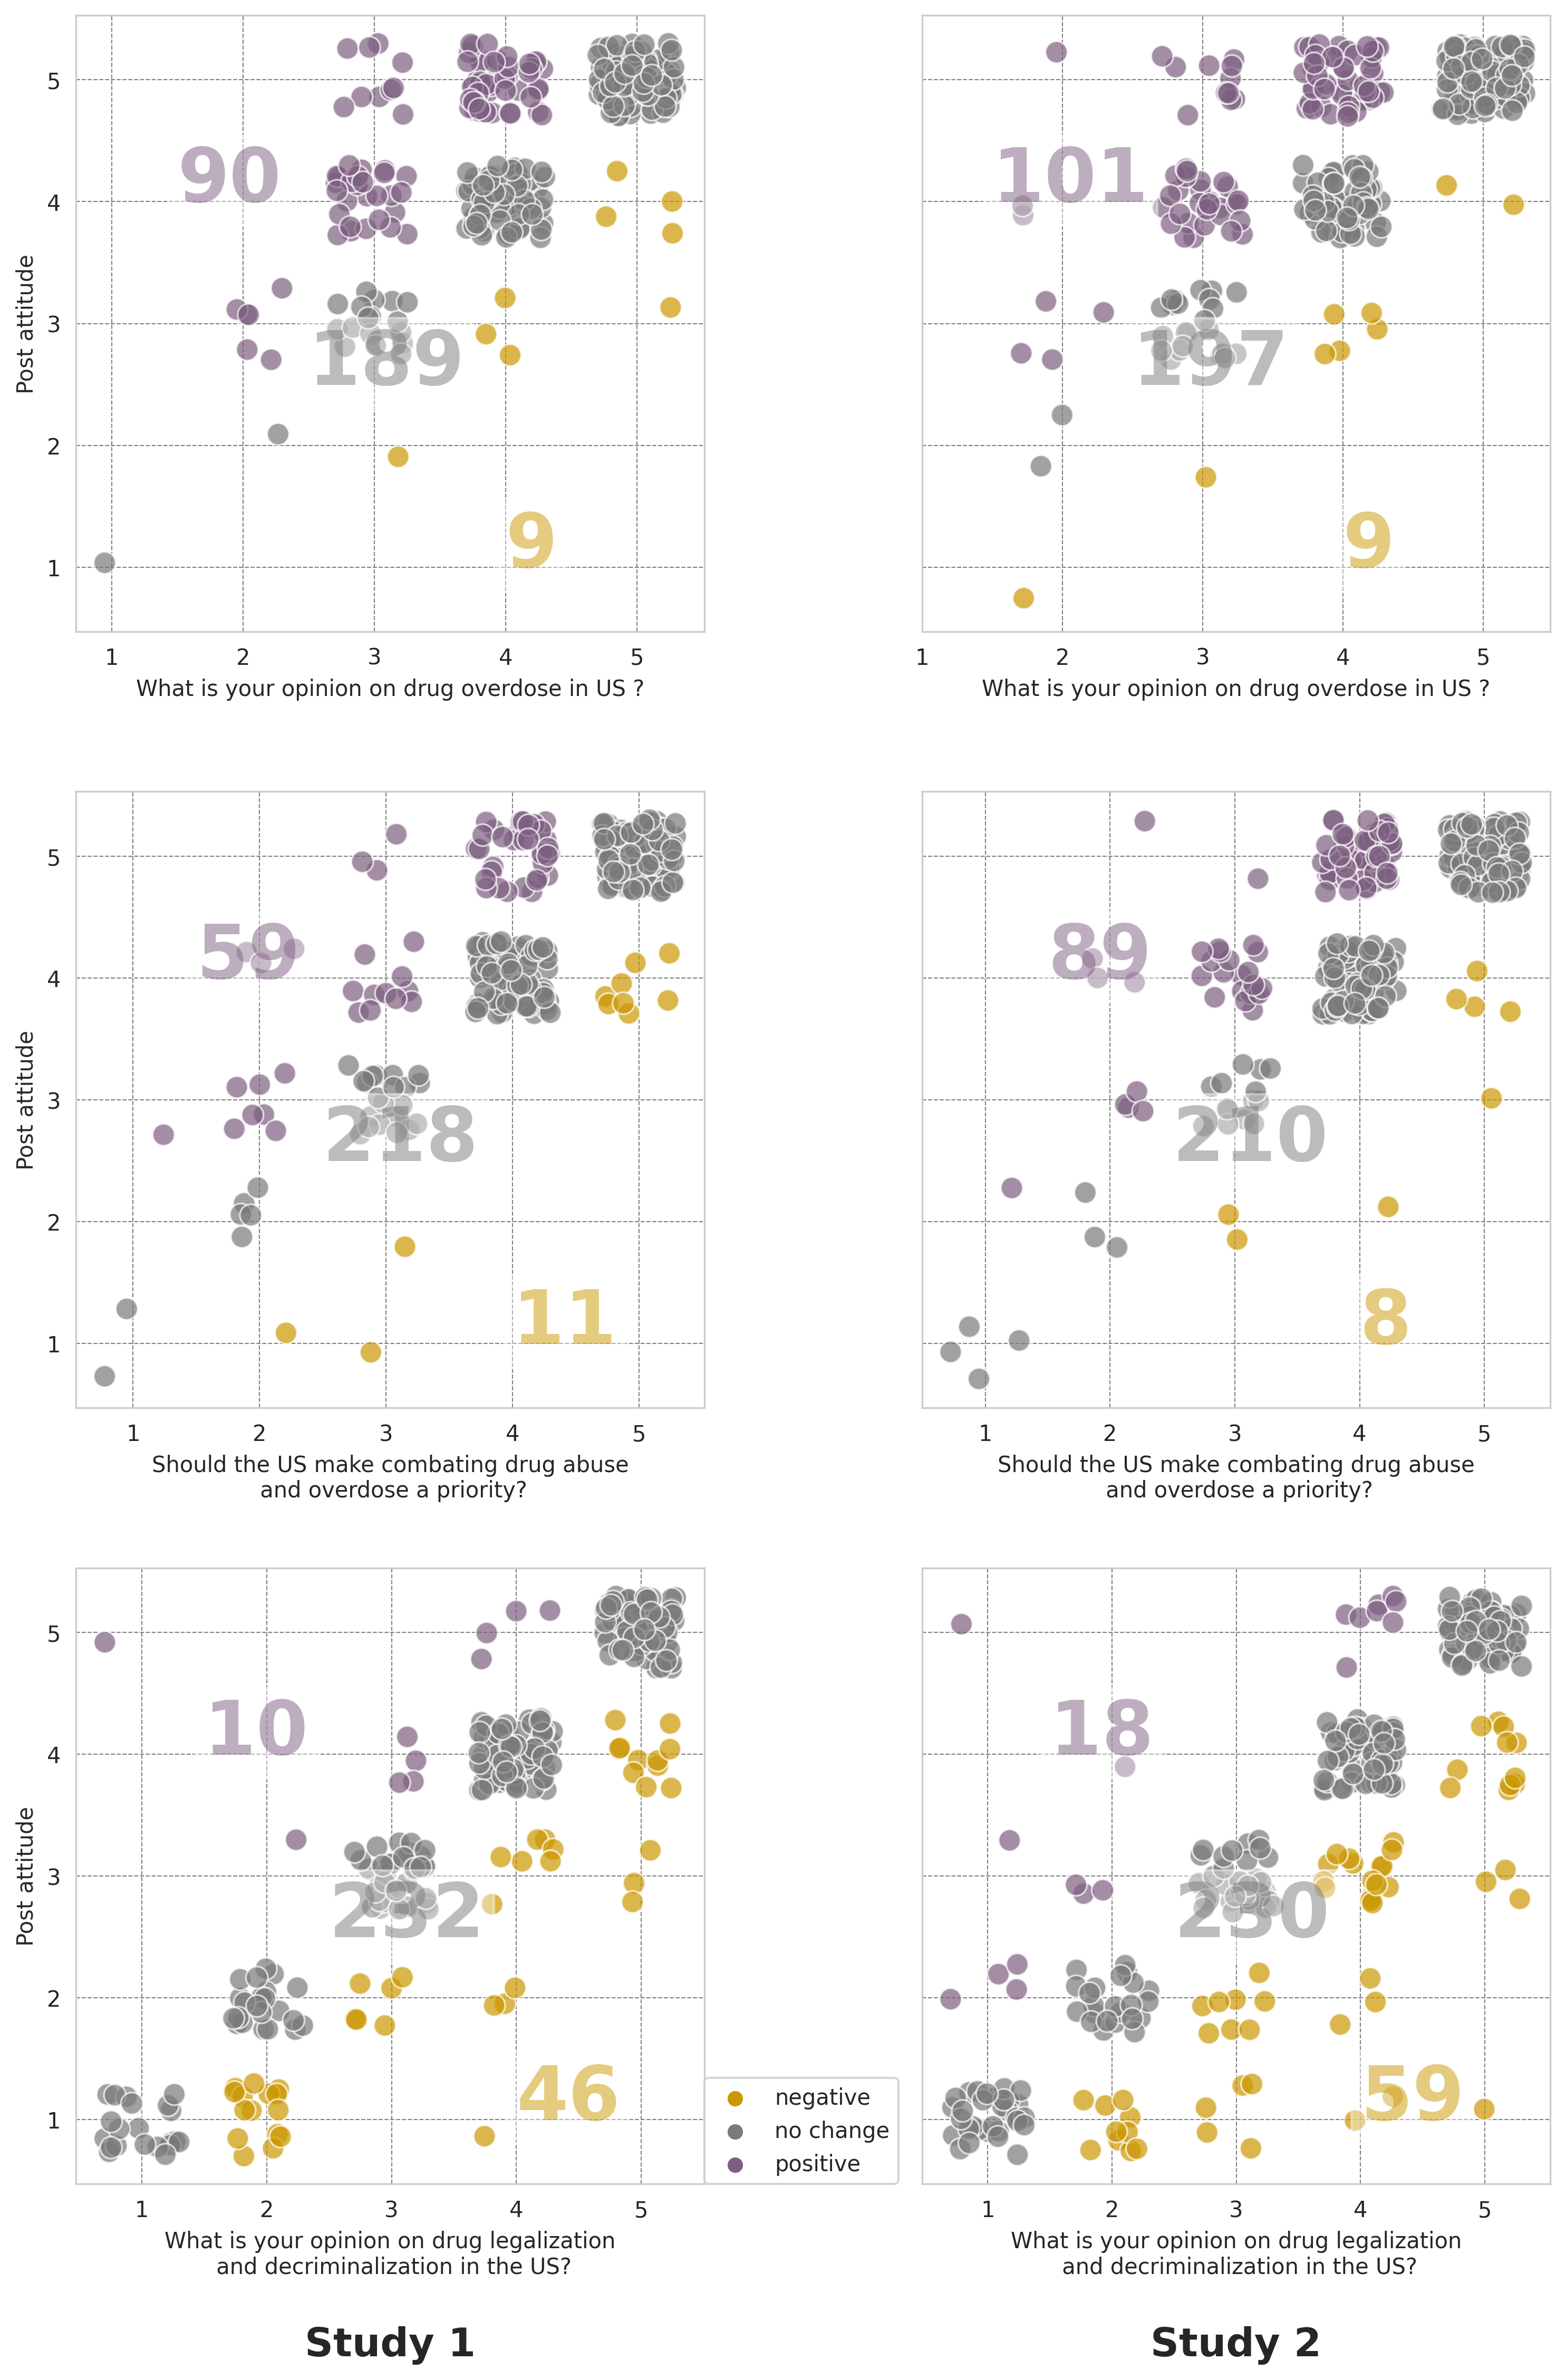

In [ ]:

fig, axes = plt.subplots(3,2, figsize=(10,15), sharey=True, dpi=300)
for i in range(len(axes)):
  for j in range(len(axes[i])):
    c = column_pairs[i]
    if j == 0:
      if i == 2:
        draw_att_chg_vert(df, axes[i][j], c, True)
      else:
        draw_att_chg_vert(df, axes[i][j], c, False)
    else:
        draw_att_chg_vert(df2, axes[i][j], c, False)

for i in range(3):
  for j in range(2):
    axes[i][j].set_xticks(list(range(1,6)))
    axes[i][j].set_yticks(list(range(1,6)))
    axes[i][j].grid(color='gray', linestyle='--', linewidth=.5, which='both')
    axes[i][j].set_ylabel('Post attitude', wrap=True)
    axes[i][j].set_xlabel(questions[i], ha='center', wrap=True, rotation=0)

for j in range(2):
  axes[2][j].set_title(f'Study {j+1}', y=-0.3,
            fontdict= {'family':'DejaVu Sans', 'fontsize': 18,
            'fontweight' : 'bold'},
            loc='center')

for c in range(0,2):
  for r in range(0,3):
    if c > 0:
      values_dict = df2[hue_cols[r]].value_counts().to_dict()
    else:
      values_dict = df[hue_cols[r]].value_counts().to_dict()
    for j, k in enumerate(h_order):
      axes[r][c].text(x=text_coords[j][0], y= text_coords[j][1], s=f'{values_dict[k]}', fontdict={'family':'DejaVu Sans', 'fontsize': 34,
            'fontweight' : 'bold', 'color': change_palette[j]}, bbox=dict(facecolor='white', alpha=0.4), alpha=.5)


plt.tight_layout(h_pad=3)

plt.savefig('./python_analysis/results_figures/attitude_change_combined_v.pdf', transparent=True)
# plt.savefig('./python_analysis/results_figures/attitude_change_combined_v.svg')
# plt.savefig('./python_analysis/results_figures/attitude_change_combined_v.jpg')


study1

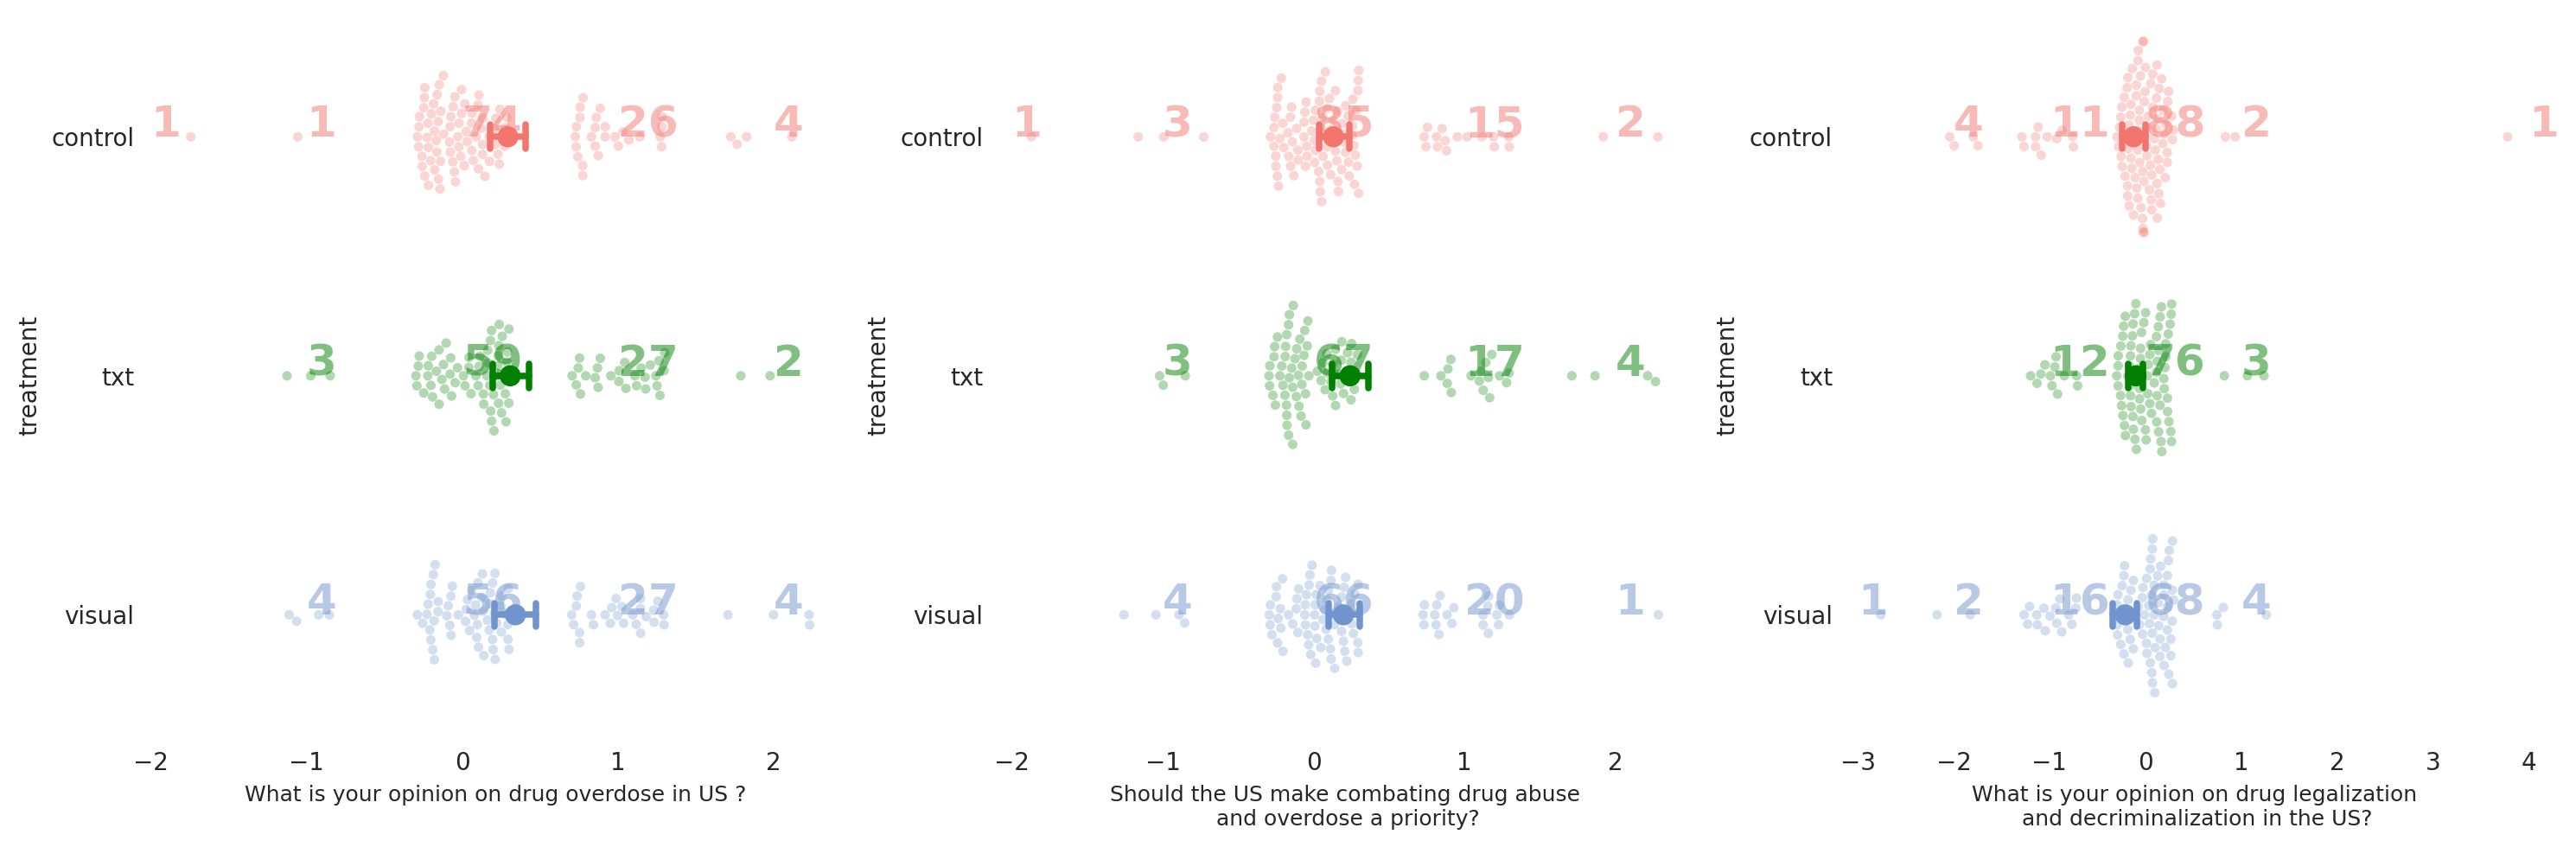

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5), dpi=200)
fig.tight_layout(pad=2.5)
axes = [ax1,ax2,ax3]
c_palette = ['#F3766E','green','#7094CD']
for count,col in enumerate(delta_cols_1):
  sns.pointplot(ax=axes[count],
                data=df,
                y="treatment",
                x=col,
                join=False,
                order=order,
                errorbar=('ci',95),
                palette=colors,
                label='average',
                seed = 72,
                capsize=.1
                )
  x_vals = df[col].unique()
  x_vals.sort()
  for i in (x_vals):
    x_val = i
    for j,tr in enumerate(order):
      if (x_val in df[df['treatment'] == tr][col].value_counts().keys()):
        axes[count].text(x=i, y=j, s=f"{df[df['treatment'] == tr][col].value_counts()[x_val]}",
                         fontdict={'family':'DejaVu Sans', 'fontsize': 18,'fontweight' : 'bold', 'color':colors[j]}, alpha=.5)

  g = sns.swarmplot(
                    ax=axes[count],
                    data=df,
                    x=f"{col}_noise",
                    y="treatment",
                    order=order,
                    alpha=0.3,
                    size= 4,
                    hue='treatment',
                    hue_order= order,
                    palette= c_palette,
                    legend=False,
                    )
  g.grid(False)
  g.set_xticks(list(range(min(x_vals), max(x_vals)+1)))
  # g.set_xticklabels([k for k in list(rateMap_collection[count].keys())],wrap=True, rotation=45, fontsize=6)
  g.set_xlabel(f'{questions[count]}', fontdict={'family':'DejaVu Sans', 'fontsize': 9})
  plt.tight_layout()
  sns.despine(bottom = True, left = True)

# plt.savefig(f'./python_analysis/results_figures/attitude_change/att_change_study1.svg')
# plt.savefig(f'./python_analysis/results_figures/attitude_change/att_change_study1.jpg')
plt.savefig(f'./python_analysis/results_figures/attitude_change/att_change_study1.pdf')


In [ ]:
for c in delta_cols_2:
  print(c, df2[c].dropna().isna().value_counts())

att_elic_delta_drug_overdose_opinion False    307
Name: att_elic_delta_drug_overdose_opinion, dtype: int64
att_elic_delta_combat_drug_priority False    307
Name: att_elic_delta_combat_drug_priority, dtype: int64
att_elic_delta_opinion_on_drug_legalization False    307
Name: att_elic_delta_opinion_on_drug_legalization, dtype: int64


In [ ]:
print(df2.shape)
df2.dropna(how='all',axis=1, inplace=True)
print(df2.shape)

(307, 54)
(307, 54)


Study2

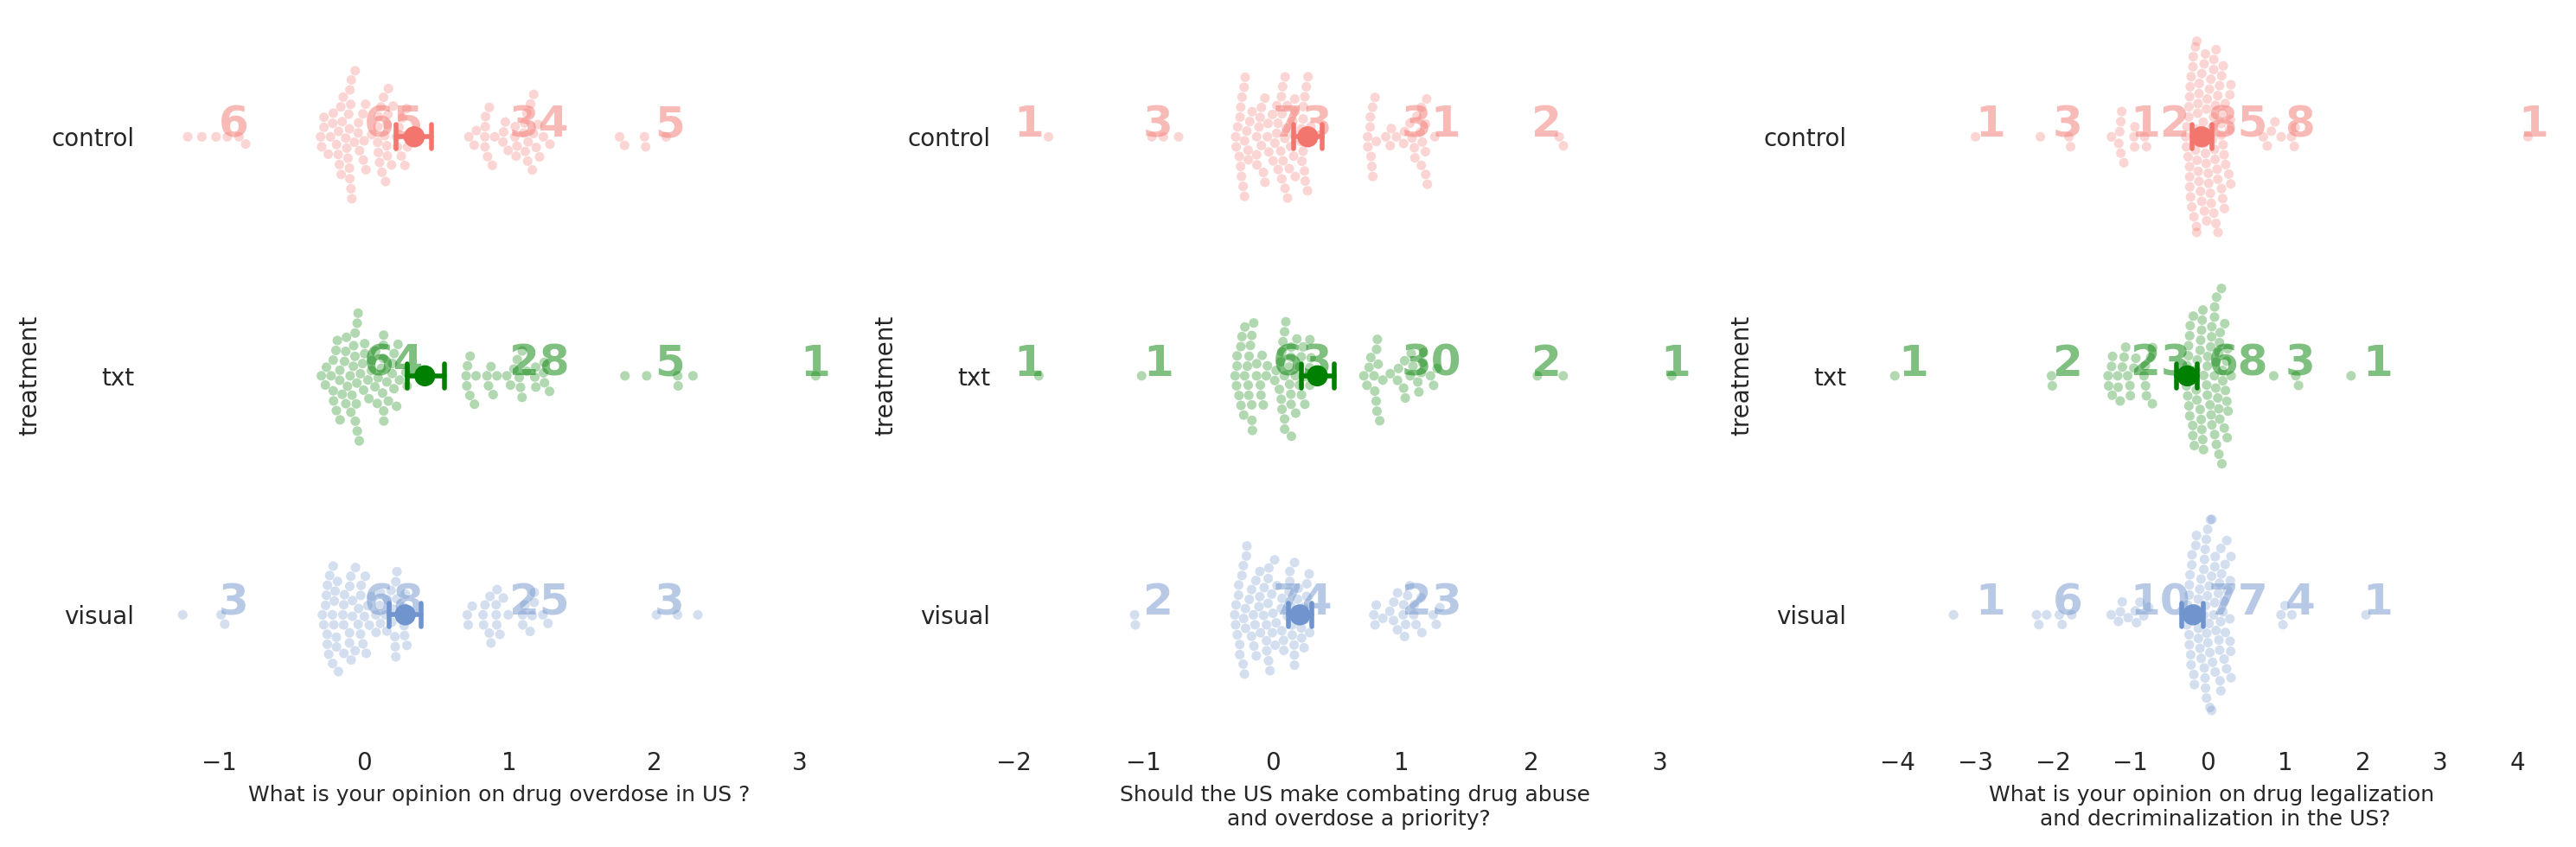

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5), dpi=200)
fig.tight_layout(pad=2.5)
axes = [ax1,ax2,ax3]

for count,col in enumerate(delta_cols_1):

  sns.pointplot(ax=axes[count],
                data=df2,
                y="treatment",
                x=col,
                join=False,
                order=order,
                errorbar=('ci',95),
                palette=colors,
                label='average',
                capsize=.1,
                errwidth=2,)
  x_vals = df2[col].unique()
  x_vals.sort()
  for i in (x_vals):
    x_val = i
    for j,tr in enumerate(order):
      if (x_val in df2[df2['treatment'] == tr][col].value_counts().keys()):
        axes[count].text(x=i, y=j, s=f"{df2[df2['treatment'] == tr][col].value_counts()[x_val]}",
                         fontdict={'family':'DejaVu Sans', 'fontsize': 18,'fontweight' : 'bold', 'color':colors[j]}, alpha=.5)

  g = sns.swarmplot(
                    ax=axes[count],
                    data=df2,
                    x=f"{col}_noise",
                    y="treatment",
                    order=order,
                    alpha=0.3,
                    size= 4,
                    hue='treatment',
                    hue_order= order,
                    palette= ['#F3766E','green','#7094CD'],
                    legend=False)
  g.grid(False)
  g.set_xticks(list(range(int(min(x_vals)), int(max(x_vals)+1))))
  # g.set_xticklabels([k for k in list(rateMap_collection[count].keys())],wrap=True, rotation=45, fontsize=6)
  g.set_xlabel(f'{questions[count]}', fontdict={'family':'DejaVu Sans', 'fontsize': 9})
  plt.tight_layout()
  sns.despine(bottom = True, left = True)

# plt.savefig(f'./python_analysis/results_figures/attitude_change/att_change_study2.svg')
# plt.savefig(f'./python_analysis/results_figures/attitude_change/att_change_study2.jpg')
plt.savefig(f'./python_analysis/results_figures/attitude_change/att_change_study2.pdf')